In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_excel('Admission.xlsx')
df.head()

,SlNo,Gender,Percent_SSC,Board_SSC,Percent_HSC,Board_HSC,Stream_HSC,Percent_Degree,Course_Degree,Experience_Yrs,Entrance_Test,Percentile_ET,Percent_MBA,Specialization_MBA,Marks_Communication,Marks_Projectwork,Marks_BOCA,Placement,Salary
0,1,M,62.00,Others,88.00,Others,Commerce,52.00,Science,0,MAT,55.0,58.80,Marketing & HR,50,65,74,Placed,270000
1,2,M,76.33,ICSE,75.33,Others,Science,75.48,Computer Applications,1,MAT,86.5,66.28,Marketing & Finance,69,70,75,Placed,200000
2,3,M,72.00,Others,78.00,Others,Commerce,66.63,Engineering,0,NaN,0.0,52.91,Marketing & Finance,50,61,59,Placed,240000
3,4,M,60.00,CBSE,63.00,CBSE,Arts,58.00,Management,0,MAT,75.0,57.80,Marketing & Finance,54,66,62,Placed,250000
4,5,M,61.00,CBSE,55.00,ISC,Science,54.00,Engineering,1,MAT,66.0,59.43,Marketing & HR,52,65,67,Placed,180000


In [3]:
df.shape

(391, 19)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SlNo                 391 non-null    int64  
 1   Gender               391 non-null    object 
 2   Percent_SSC          391 non-null    float64
 3   Board_SSC            391 non-null    object 
 4   Percent_HSC          391 non-null    float64
 5   Board_HSC            391 non-null    object 
 6   Stream_HSC           391 non-null    object 
 7   Percent_Degree       391 non-null    float64
 8   Course_Degree        391 non-null    object 
 9   Experience_Yrs       391 non-null    int64  
 10  Entrance_Test        324 non-null    object 
 11  Percentile_ET        391 non-null    float64
 12  Percent_MBA          391 non-null    float64
 13  Specialization_MBA   391 non-null    object 
 14  Marks_Communication  391 non-null    int64  
 15  Marks_Projectwork    391 non-null    int

In [5]:
df.describe()

,SlNo,Percent_SSC,Percent_HSC,Percent_Degree,Experience_Yrs,Percentile_ET,Percent_MBA,Marks_Communication,Marks_Projectwork,Marks_BOCA,Salary
count,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000
mean,196.000000,64.652353,63.795294,62.983606,0.478261,54.934962,61.667698,60.539642,68.363171,64.378517,219078.260870
std,113.016223,10.960426,11.417726,8.916152,0.667112,31.168264,5.854399,8.824084,7.145095,9.582834,138311.647036
min,1.000000,37.000000,40.000000,35.000000,0.000000,0.000000,50.830000,50.000000,50.000000,50.000000,0.000000
25%,98.500000,56.000000,54.000000,57.525000,0.000000,41.190000,57.195000,53.000000,64.000000,57.000000,172800.000000
50%,196.000000,64.500000,63.000000,63.000000,0.000000,62.000000,61.010000,58.000000,69.000000,63.000000,240000.000000
75%,293.500000,74.000000,72.000000,69.000000,1.000000,78.000000,66.020000,67.000000,74.000000,72.500000,300000.000000
max,391.000000,87.200000,94.700000,89.000000,3.000000,98.690000,77.890000,88.000000,87.000000,96.000000,940000.000000


In [6]:
df.drop('SlNo', axis=1, inplace=True)

In [7]:
df.describe(include=object)

,Gender,Board_SSC,Board_HSC,Stream_HSC,Course_Degree,Entrance_Test,Specialization_MBA,Placement
count,391,391,391,391,391,324,391,391
unique,2,3,3,3,7,8,3,2
top,M,Others,Others,Commerce,Management,MAT,Marketing & Finance,Placed
freq,264,201,247,222,163,265,222,312


In [8]:
df.duplicated().sum()

0

In [9]:
df.isnull().sum()/len(df)*100

Gender                  0.00000
Percent_SSC             0.00000
Board_SSC               0.00000
Percent_HSC             0.00000
Board_HSC               0.00000
Stream_HSC              0.00000
Percent_Degree          0.00000
Course_Degree           0.00000
Experience_Yrs          0.00000
Entrance_Test          17.13555
Percentile_ET           0.00000
Percent_MBA             0.00000
Specialization_MBA      0.00000
Marks_Communication     0.00000
Marks_Projectwork       0.00000
Marks_BOCA              0.00000
Placement               0.00000
Salary                  0.00000
dtype: float64

In [10]:
num = df.select_dtypes(exclude=object)
cat = df.select_dtypes(include=object)

In [11]:
for i in cat:
    print(cat[i].value_counts(normalize=True)*100)

M    67.519182
F    32.480818
Name: Gender, dtype: float64
Others    51.406650
CBSE      28.900256
ICSE      19.693095
Name: Board_SSC, dtype: float64
Others    63.171355
CBSE      24.552430
ISC       12.276215
Name: Board_HSC, dtype: float64
Commerce    56.777494
Science     38.618926
Arts         4.603581
Name: Stream_HSC, dtype: float64
Management               41.687980
Commerce                 29.923274
Engineering               9.462916
Computer Applications     8.184143
Science                   6.138107
Arts                      3.324808
Others                    1.278772
Name: Course_Degree, dtype: float64
MAT      81.790123
K-MAT     7.407407
CAT       6.790123
PGCET     2.469136
GCET      0.617284
G-MAT     0.308642
XAT       0.308642
G-SAT     0.308642
Name: Entrance_Test, dtype: float64
Marketing & Finance    56.777494
Marketing & HR         39.897698
Marketing & IB          3.324808
Name: Specialization_MBA, dtype: float64
Placed        79.795396
Not Placed    20.204604
N

In [12]:
cat['Entrance_Test'] = cat['Entrance_Test'].fillna(value='Unknown')

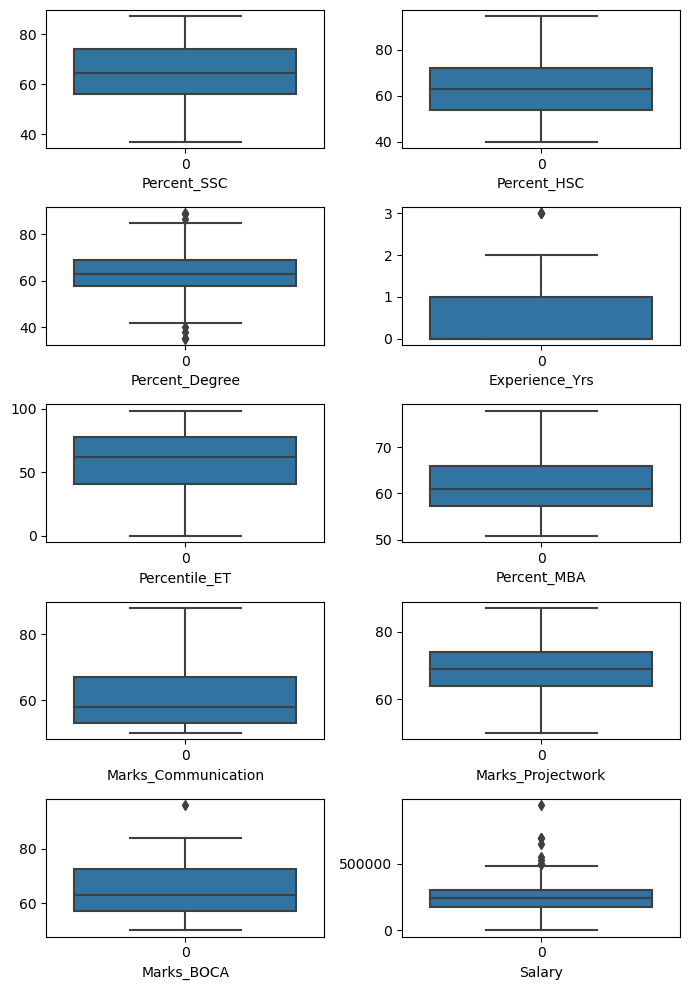

In [13]:
fig, ax = plt.subplots(5, 2, figsize=(7,10))
for i,j in zip(num.columns, ax.flatten()):
    boxplt=sns.boxplot(num[i], ax=j)
    boxplt.set_xlabel(i)
plt.tight_layout()
plt.show()

In [14]:
q1 = num.drop('Salary', axis=1).quantile(0.25) 
q3 = num.drop('Salary', axis=1).quantile(0.75) 
IQR = q3-q1
lower = q1 - 1.5*IQR 
upper = q3 + 1.5*IQR 
print('Lower:{},Upper:{}'.format(lower,upper))

Lower:Percent_SSC            29.0000
Percent_HSC            27.0000
Percent_Degree         40.3125
Experience_Yrs         -1.5000
Percentile_ET         -14.0250
Percent_MBA            43.9575
Marks_Communication    32.0000
Marks_Projectwork      49.0000
Marks_BOCA             33.7500
dtype: float64,Upper:Percent_SSC            101.0000
Percent_HSC             99.0000
Percent_Degree          86.2125
Experience_Yrs           2.5000
Percentile_ET          133.2150
Percent_MBA             79.2575
Marks_Communication     88.0000
Marks_Projectwork       89.0000
Marks_BOCA              95.7500
dtype: float64


In [15]:
newdata =df[~((df<lower) | (df>upper)).any(axis=1)]
newdata.shape

C:\Users\Atharva Changade\AppData\Local\Temp\ipykernel_6356\1557348513.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  newdata =df[~((df<lower) | (df>upper)).any(axis=1)]


(379, 18)

C:\Users\Atharva Changade\AppData\Local\Temp\ipykernel_6356\1516553243.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  distplt=sns.distplot(num[i], ax=j)
C:\Users\Atharva Changade\AppData\Local\Temp\ipykernel_6356\1516553243.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  distplt=sns.distplot(num[i], ax=j)
C:\Use

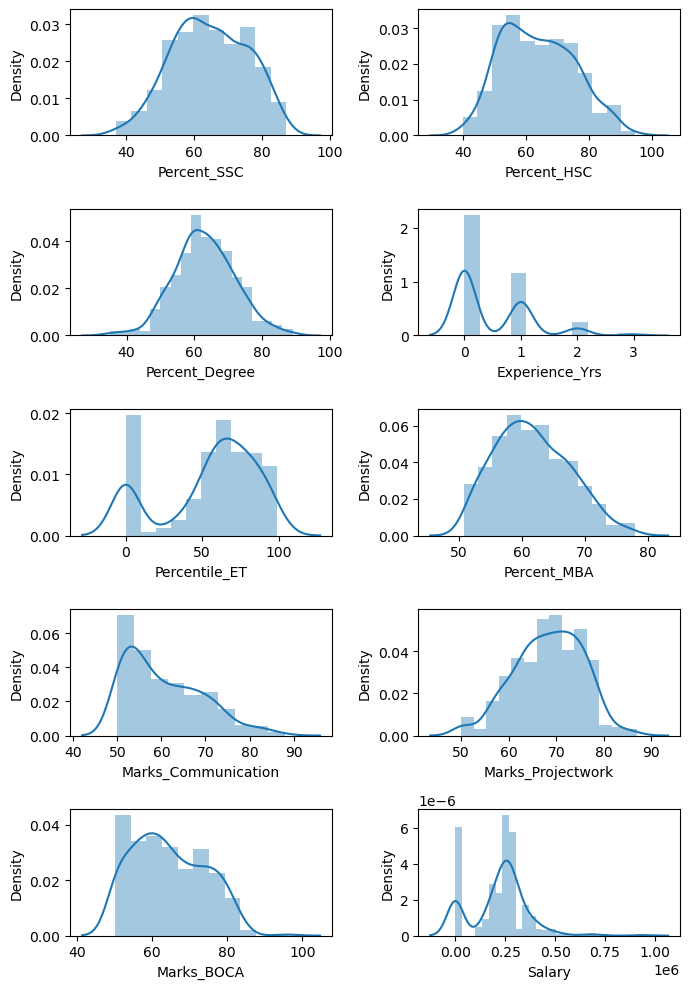

In [16]:
fig, ax = plt.subplots(5, 2, figsize=(7,10))
for i,j in zip(num.columns, ax.flatten()):
    distplt=sns.distplot(num[i], ax=j)
    distplt.set_xlabel(i)
plt.tight_layout()
plt.show()

In [17]:
df.corr()

C:\Users\Atharva Changade\AppData\Local\Temp\ipykernel_6356\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Percent_SSC,Percent_HSC,Percent_Degree,Experience_Yrs,Percentile_ET,Percent_MBA,Marks_Communication,Marks_Projectwork,Marks_BOCA,Salary
Percent_SSC,1.000000,0.396585,0.413072,-0.015237,0.211517,0.475638,0.476279,0.132496,0.271597,0.205134
Percent_HSC,0.396585,1.000000,0.338943,-0.042638,0.151457,0.380495,0.321432,0.160446,0.156589,0.095793
Percent_Degree,0.413072,0.338943,1.000000,-0.029147,0.213127,0.447138,0.412716,0.191756,0.268876,0.098528
Experience_Yrs,-0.015237,-0.042638,-0.029147,1.000000,-0.009219,0.160725,0.086718,0.142599,0.172957,0.142547
Percentile_ET,0.211517,0.151457,0.213127,-0.009219,1.000000,0.214161,0.200447,0.146226,0.138224,0.150589
Percent_MBA,0.475638,0.380495,0.447138,0.160725,0.214161,1.000000,0.706999,0.435558,0.476736,0.176594
Marks_Communication,0.476279,0.321432,0.412716,0.086718,0.200447,0.706999,1.000000,0.308851,0.210567,0.128061
Marks_Projectwork,0.132496,0.160446,0.191756,0.142599,0.146226,0.435558,0.308851,1.000000,0.260201,0.155142
Marks_BOCA,0.271597,0.156589,0.268876,0.172957,0.138224,0.476736,0.210567,0.260201,1.000000,0.134112
Salary,0.205134,0.095793,0.098528,0.142547,0.150589,0.176594,0.128061,0.155142,0.134112,1.000000


C:\Users\Atharva Changade\AppData\Local\Temp\ipykernel_6356\597686425.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)


<Axes: >

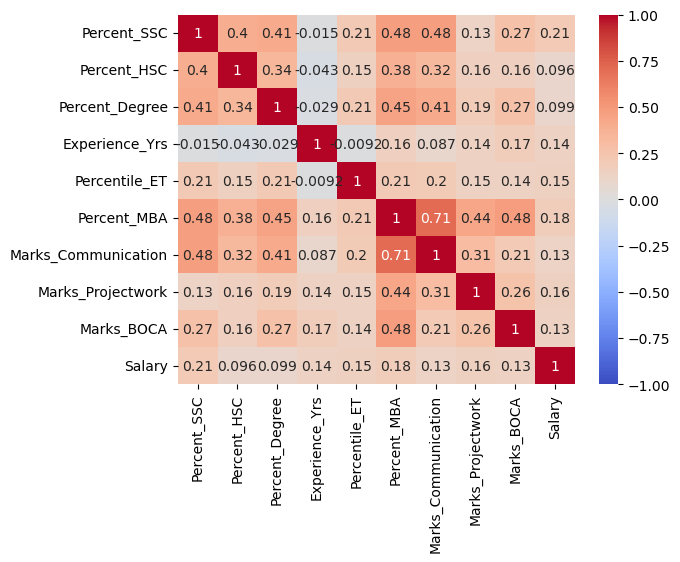

In [18]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
import statsmodels.api as sm
df_num = sm.add_constant(num)
vif = [VIF(df_num.values, i) for i in range(df_num.shape[1])]
pd.DataFrame(vif, columns=['VIF'], index=df_num.columns).sort_values('VIF', ascending=False)

,VIF
const,159.067272
Percent_MBA,2.988613
Marks_Communication,2.256215
Percent_SSC,1.591685
Percent_Degree,1.414040
Marks_BOCA,1.410638
Percent_HSC,1.297858
Marks_Projectwork,1.275859
Percentile_ET,1.098639
Salary,1.094516


In [20]:
from category_encoders import CatBoostEncoder
cab = CatBoostEncoder()
encode_cat = cab.fit_transform(df[cat.columns], df['Salary'])

In [21]:
data = pd.concat([num, encode_cat], axis=1)
data.head()

,Percent_SSC,Percent_HSC,Percent_Degree,Experience_Yrs,Percentile_ET,Percent_MBA,Marks_Communication,Marks_Projectwork,Marks_BOCA,Salary,Gender,Board_SSC,Board_HSC,Stream_HSC,Course_Degree,Entrance_Test,Specialization_MBA,Placement
0,62.00,88.00,52.00,0,55.0,58.80,50,65,74,270000,219078.260870,219078.260870,219078.260870,219078.260870,219078.260870,219078.260870,219078.260870,219078.260870
1,76.33,75.33,75.48,1,86.5,66.28,69,70,75,200000,244539.130435,219078.260870,244539.130435,219078.260870,219078.260870,244539.130435,219078.260870,244539.130435
2,72.00,78.00,66.63,0,0.0,52.91,50,61,59,240000,229692.753623,244539.130435,229692.753623,244539.130435,219078.260870,219078.260870,209539.130435,229692.753623
3,60.00,63.00,58.00,0,75.0,57.80,54,66,62,250000,232269.565217,219078.260870,219078.260870,219078.260870,219078.260870,229692.753623,219692.753623,232269.565217
4,61.00,55.00,54.00,1,66.0,59.43,52,65,67,180000,235815.652174,234539.130435,219078.260870,209539.130435,229539.130435,234769.565217,244539.130435,235815.652174


In [22]:
from sklearn.model_selection import train_test_split
X = data.drop('Salary', axis=1)
y= data['Salary']
xtrain, xtest, ytrain, ytest = train_test_split(X,y,test_size=0.3,random_state=10)

In [27]:
import scipy.stats as stats
t_statistic, p_value = stats.ttest_ind(xtrain, xtest)
print("\nT-test Results:")
print("T-statistic:", t_statistic)
print("p-value:", p_value)
if p_value > 0.05:
    print("The means of train and test datasets are not significantly different.")
else:
    print("The means of train and test datasets are significantly different.")


T-test Results:
T-statistic: [ 0.75836418  0.95200693 -0.62009901 -0.75350767 -0.00262831  0.77263186
  1.20775322  1.34057882  0.8696232  -0.23060171  0.30528689  1.04592368
  0.41745199  0.97627548  0.35443726 -0.15105584 -1.40394476]
p-value: [0.44869221 0.34168461 0.53555568 0.45160072 0.99790426 0.44020947
 0.22787598 0.1808396  0.38504262 0.81774547 0.76031095 0.29624574
 0.67657814 0.32953469 0.72320327 0.88000997 0.16113314]


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()